In [28]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def get_boston_data():
    dict_data = load_boston()
    inputs = np.array(dict_data.data)
    labels = np.array(dict_data.target)
    return inputs, labels

def normalize_data(data):
    mu = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mu) / std

# for linear regression model
def add_bias(inputs):
    num_data, num_input_dim = inputs.shape
    bias_term = np.ones((num_data, 1))
    new_inputs = np.concatenate((inputs, bias_term), axis=1)
    return new_inputs

In [23]:
inputs, labels = get_boston_data()
labels = np.expand_dims(labels, axis=1)
normalized_inputs = normalize_data(inputs)
normalized_labels = normalize_data(labels)
normalized_inputs_plus_bias = add_bias(normalized_inputs)
input_dim = normalized_inputs_plus_bias.shape[1]
output_dim = 1

In [24]:
# define placeholders and a variable
X = tf.placeholder(tf.float32, [None, input_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])
w = tf.Variable(tf.random_normal((input_dim, 1)), name="weights")

# Linear Regression Model

In [25]:
# define hyper params
lr = 0.001
num_epochs = 10000
loss_log = []

#linear regression model
pred = tf.matmul(X, w)
loss = tf.reduce_mean(tf.square(pred - Y))
train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)

100%|██████████| 10000/10000 [00:13<00:00, 719.20it/s]

Final Loss
 0.2642085
The Best Loss
 0.2603946


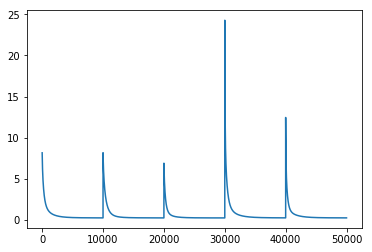

In [32]:
# train the linear model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in tqdm(range(num_epochs)):
        sess.run(train_step, feed_dict={X: normalized_inputs_plus_bias, Y: normalized_labels})
        loss_log.append(sess.run(loss, feed_dict={X: normalized_inputs_plus_bias, Y: normalized_labels}))
    print("Final Loss\n", sess.run(loss, feed_dict={X: normalized_inputs_plus_bias, Y: normalized_labels}))
    
print("The Best Loss\n", min(loss_log))
plt.plot(loss_log)

# MLP(Multi-Layer Perceptron) Model